# Acquire

In [66]:
import os
from env import host, user, password
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [80]:
################### Connects to Sequel Ace using credentials ###################

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


################### Create new dataframe from SQL db ###################
    
def new_zillow_data():
    '''
    This function reads the zillow data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''

    # Create SQL query.
    sql_query = """
            SELECT 	prop.*, 
                ac.airconditioningdesc,
                txn.transactiondate, 
                pred.logerror, 
                ast.architecturalstyledesc,
                bc.buildingclassdesc,
                hs.heatingorsystemdesc,
                plu.propertylandusedesc,
                st.storydesc,
                tc.typeconstructiondesc
            FROM properties_2017 prop
            JOIN (
                SELECT parcelid, max(transactiondate) as transactiondate
                FROM predictions_2017
                GROUP BY parcelid
                ) AS txn ON prop.parcelid = txn.parcelid
            JOIN predictions_2017 AS pred  
            ON prop.parcelid = pred.parcelid 
                AND pred.transactiondate = txn.transactiondate
            LEFT JOIN airconditioningtype AS ac
            USING(airconditioningtypeid)
            LEFT JOIN architecturalstyletype AS ast
            USING (architecturalstyletypeid)
            LEFT JOIN buildingclasstype AS bc
            USING (buildingclasstypeid)
            LEFT JOIN heatingorsystemtype AS hs
            USING (heatingorsystemtypeid)
            LEFT JOIN propertylandusetype AS plu
            USING (propertylandusetypeid)
            LEFT JOIN storytype AS st
            USING (storytypeid)
            LEFT JOIN typeconstructiontype AS tc
            USING (typeconstructiontypeid)
            WHERE COALESCE(prop.longitude, prop.latitude) IS NOT NULL
                AND propertylandusetypeid IN ('261', '262', '263', '264', '265', '266', '268', '271', '273', '274', '275', '276', '279'); 
            """
    # Read in DataFrame from Codeup's SQL db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df


################### Acquire existing csv file ###################

def get_zillow_data():
    '''
    This function reads in zillow data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_zillow_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow.csv')
        
    return df
df = get_zillow_data()

In [81]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,transactiondate,logerror,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50000,4.00000,NaN,NaN,3.50000,NaN,NaN,3100.00000,3100.00000,NaN,NaN,NaN,NaN,6059.00000,NaN,3.00000,2.00000,633.00000,NaN,NaN,33634931.00000,-117869207.00000,4506.00000,NaN,NaN,NaN,NaN,NaN,122,261.00000,NaN,60590630.07201,53571.00000,1286.00000,NaN,96978.00000,0.00000,NaN,1.00000,NaN,NaN,NaN,NaN,1998.00000,NaN,NaN,485713.00000,1023282.00000,2016.00000,537569.00000,11013.72000,NaN,NaN,60590630072012.00000,NaN,2017-01-01,0.02559,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00000,2.00000,NaN,NaN,1.00000,NaN,1465.00000,1465.00000,1465.00000,NaN,NaN,1465.00000,NaN,6111.00000,1.00000,1.00000,1.00000,0.00000,NaN,NaN,34449266.00000,-119281531.00000,12647.00000,NaN,NaN,NaN,NaN,NaN,1110,261.00000,NaN,61110010.02301,13091.00000,2061.00000,NaN,97099.00000,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,1967.00000,1.00000,NaN,88000.00000,464000.00000,2016.00000,376000.00000,5672.48000,NaN,NaN,61110010023006.00000,NaN,2017-01-01,0.05562,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00000,3.00000,NaN,NaN,2.00000,NaN,NaN,1243.00000,1243.00000,NaN,NaN,NaN,NaN,6059.00000,NaN,2.00000,2.00000,440.00000,NaN,NaN,33886168.00000,-117823170.00000,8432.00000,1.00000,NaN,NaN,NaN,1.00000,122,261.00000,NaN,60590218.02201,21412.00000,1286.00000,NaN,97078.00000,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,1962.00000,1.00000,NaN,85289.00000,564778.00000,2016.00000,479489.00000,6488.30000,NaN,NaN,60590218022012.00000,NaN,2017-01-01,0.00538,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00000,4.00000,NaN,8.00000,3.00000,NaN,NaN,2376.00000,2376.00000,NaN,NaN,NaN,NaN,6037.00000,NaN,3.00000,NaN,NaN,NaN,2.00000,34245180.00000,-118240722.00000,13038.00000,1.00000,NaN,NaN,NaN,1.00000,0101,261.00000,LCR110000*,60373001.00101,396551.00000,3101.00000,NaN,96330.00000,0.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1970.00000,NaN,NaN,108918.00000,145143.00000,2016.00000,36225.00000,1777.51000,NaN,NaN,60373001001006.00000,NaN,2017-01-01,-0.10341,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.00000,NaN,NaN,3.00000,3.00000,NaN,8.00000,3.00000,NaN,NaN,1312.00000,1312.00000,NaN,NaN,NaN,NaN,6037.00000,NaN,3.00000,NaN,NaN,NaN,2.00000,34185120.00000,-118414640.00000,278581.00000,1.00000,NaN,NaN,NaN,1.00000,010C,266.00000,LAR3,60371236.01200,12447.00000,3101.00000,268548.00000,96451.00000,0.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1964.00000,NaN,NaN,73681.00000,119407.00000,2016.00000,45726.00000,1533.89000,NaN,NaN,60371236012000.00000,Central,2017-01-01,0.00694,NaN,NaN,Central,Condominium,NaN,NaN


In [85]:
df.heatingorsystemdesc.value_counts()

Central       31486
Floor/Wall    13253
Yes             846
Forced air      776
Solar           101
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [4]:
def summarize_stats(df):
    print("YOU CAN'T HANDLE THE STATS!!!!!!")
    print('|------------------------------------------------------|')
    print('|------------------------------------------------------|')
    print(f'Shape: {df.shape}')
    print('|------------------------------------------------------|')
    print(df.info())
    print('|------------------------------------------------------|')
    print('|------------------------------------------------------|')
    for col in df.columns:
        print(f'|-------{col}-------|')
        print()
        print(f'dtpye: {df[col].dtype}')
        print()
        print(f'Null count: {df[col].isnull().sum()}')
        print()
        print(df[col].describe())
        print()
        print(df[col].value_counts())
        print()
        print(df[col].unique())
        print('|------------------------------------------------------|')
        print('|------------------------------------------------------|')

In [5]:
summarize_stats(df)

YOU CAN'T HANDLE THE STATS!!!!!!
|------------------------------------------------------|
|------------------------------------------------------|
Shape: (72085, 68)
|------------------------------------------------------|
<class 'pandas.core.frame.DataFrame'>
Int64Index: 72085 entries, 0 to 72084
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            72085 non-null  int64  
 1   parcelid                      72085 non-null  int64  
 2   airconditioningtypeid         23023 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   72085 non-null  float64
 6   bedroomcnt                    72085 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         44951 non-null  float64
 9   calculatedbath

1200.0    175
1120.0    164
1080.0    131
1440.0    118
1260.0    116
         ... 
5984.0      1
5685.0      1
6100.0      1
4787.0      1
5705.0      1
Name: finishedsquarefeet12, Length: 4832, dtype: int64

[3100. 1465. 1243. ... 4921. 4530. 5655.]
|------------------------------------------------------|
|------------------------------------------------------|
|-------finishedsquarefeet13-------|

dtpye: float64

Null count: 72044

count      41.000000
mean     1389.853659
std       123.531688
min      1056.000000
25%      1344.000000
50%      1440.000000
75%      1440.000000
max      1560.000000
Name: finishedsquarefeet13, dtype: float64

1440.0    18
1344.0     5
1536.0     3
1488.0     3
1248.0     2
1392.0     2
1152.0     2
1200.0     1
1056.0     1
1060.0     1
1512.0     1
1300.0     1
1560.0     1
Name: finishedsquarefeet13, dtype: int64

[  nan 1440. 1344. 1152. 1536. 1392. 1056. 1248. 1300. 1560. 1488. 1512.
 1060. 1200.]
|--------------------------------------------------

count     45366
unique     1722
top        LAR1
freq       6515
Name: propertyzoningdesc, dtype: object

LAR1         6515
LAR3         2228
LARS         1380
LBR1N        1136
LARD1.5       866
             ... 
LCR1 5000       1
LRMDR 2*        1
IRA1*           1
DOR1O5*         1
LOMC-R1*        1
Name: propertyzoningdesc, Length: 1722, dtype: int64

[nan 'LCR110000*' 'LAR3' ... 'HAR4-R2*' 'LCR1VV' 'BFA15000*']
|------------------------------------------------------|
|------------------------------------------------------|
|-------rawcensustractandblock-------|

dtpye: float64

Null count: 0

count    7.208500e+04
mean     6.049844e+07
std      2.099984e+05
min      6.037101e+07
25%      6.037400e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64

6.037137e+07    60
6.059063e+07    60
6.037277e+07    51
6.037920e+07    46
6.059032e+07    43
                ..
6.037262e+07     1
6.059100e+07     1
6.037910e+07     1
6.0

Name: yardbuildingsqft26, dtype: float64

30.0     3
120.0    3
448.0    2
300.0    2
56.0     2
240.0    2
88.0     2
33.0     2
144.0    2
204.0    1
218.0    1
60.0     1
461.0    1
336.0    1
414.0    1
180.0    1
284.0    1
216.0    1
868.0    1
368.0    1
292.0    1
39.0     1
45.0     1
196.0    1
575.0    1
37.0     1
48.0     1
314.0    1
320.0    1
491.0    1
16.0     1
66.0     1
752.0    1
160.0    1
384.0    1
231.0    1
576.0    1
41.0     1
91.0     1
174.0    1
71.0     1
49.0     1
140.0    1
648.0    1
195.0    1
72.0     1
12.0     1
113.0    1
21.0     1
462.0    1
169.0    1
200.0    1
105.0    1
486.0    1
133.0    1
360.0    1
250.0    1
28.0     1
108.0    1
Name: yardbuildingsqft26, dtype: int64

[ nan 196. 300.  56.  88. 120. 160.  45. 752. 169. 448.  21. 200.  33.
 113.  41. 314.  30.  12. 414.  66. 648. 174. 218.  60. 336. 108. 144.
 216. 360.  72. 368.  37. 105.  28. 461.  48. 240. 284.  39. 133. 486.
 250.  91. 491. 575.  16. 140.  71. 204. 195. 292. 231. 

count              206
unique               5
top       Contemporary
freq               172
Name: architecturalstyledesc, dtype: object

Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64

[nan 'Contemporary' 'Conventional' 'Ranch/Rambler' 'Cape Cod' 'Bungalow']
|------------------------------------------------------|
|------------------------------------------------------|
|-------buildingclassdesc-------|

dtpye: float64

Null count: 72085

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: buildingclassdesc, dtype: float64

Series([], Name: buildingclassdesc, dtype: int64)

[nan]
|------------------------------------------------------|
|------------------------------------------------------|
|-------heatingorsystemdesc-------|

dtpye: object

Null count: 25524

count       46561
unique         10
top       Central
freq        314

# Prepare

In [6]:
pd.set_option('display.max_rows', df.shape[1])

In [7]:
# Drop columns with. that dont have at least 50% of their values
# After the column-drop, drop all rows that dont have at least 50% of their values
df = df.dropna(axis=0, thresh=df.shape[1]*.50).dropna(axis=1, thresh=df.shape[0]*.50)

In [8]:
df = df.drop(columns=['id', 'parcelid', 'assessmentyear', 'roomcnt', 'unitcnt', 'censustractandblock', 'rawcensustractandblock', 'propertylandusetypeid', 'heatingorsystemtypeid', 'calculatedbathnbr'])

In [9]:
null_cols=[]
for col in df.columns:
    if df[col].isnull().sum() > 0:
        null_cols.append(col)

In [10]:
df[null_cols].isnull().sum()

buildingqualitytypeid           13068
calculatedfinishedsquarefeet        1
finishedsquarefeet12               20
fullbathcnt                        16
lotsizesquarefeet                2615
propertyzoningdesc              12740
regionidcity                      767
regionidzip                         5
yearbuilt                          20
structuretaxvaluedollarcnt         41
taxamount                           2
heatingorsystemdesc             11356
dtype: int64

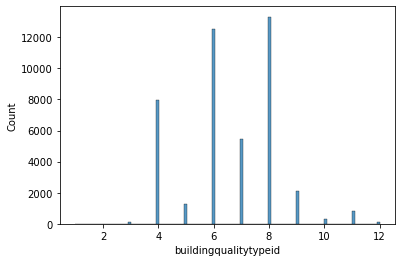

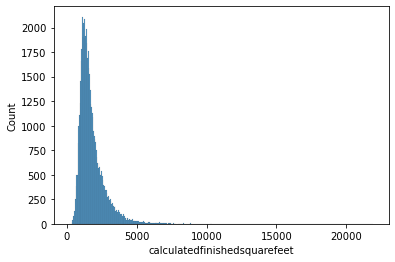

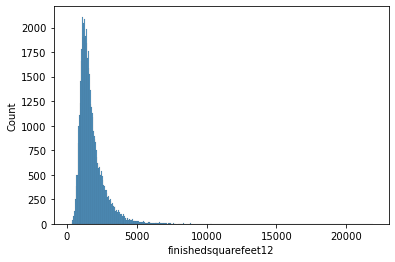

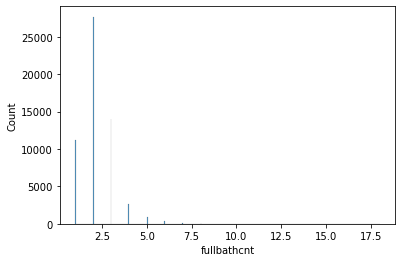

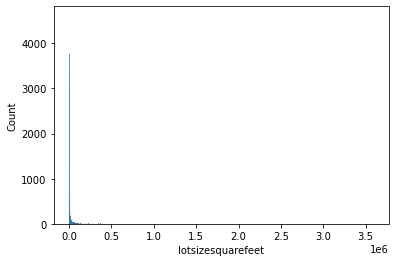

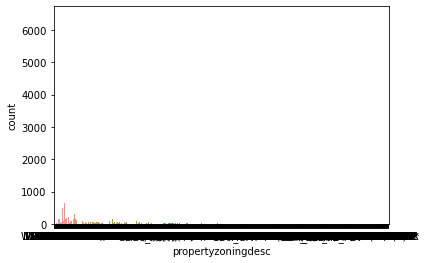

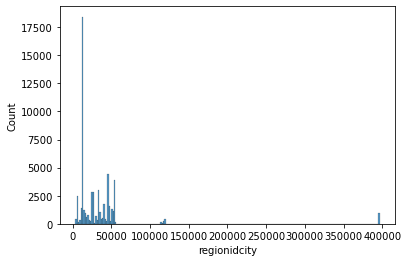

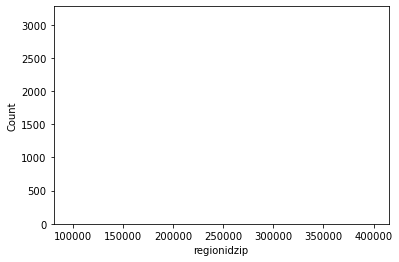

In [11]:
sns.histplot(df.buildingqualitytypeid)
plt.show()

sns.histplot(df.calculatedfinishedsquarefeet)
plt.show()

sns.histplot(df.finishedsquarefeet12)
plt.show()

sns.histplot(df.fullbathcnt)
plt.show()

sns.histplot(df.lotsizesquarefeet)
plt.show()

sns.countplot(df.propertyzoningdesc)
plt.show()

sns.histplot(df.regionidcity)
plt.show()

sns.histplot(df.regionidzip)
plt.show()

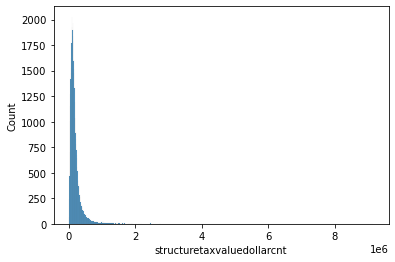

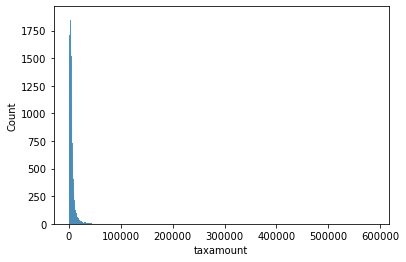

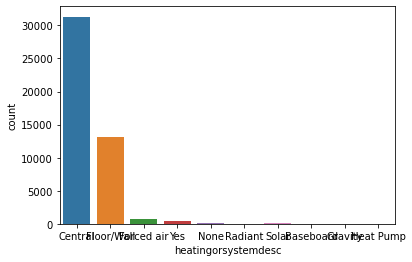

In [12]:
sns.histplot(df.structuretaxvaluedollarcnt)
plt.show()

sns.histplot(df.taxamount)
plt.show()

sns.countplot(df.heatingorsystemdesc)
plt.show()

In [13]:
# For discrete/categorical variables, i will impute the mode
mode_cols = ['buildingqualitytypeid', 'fullbathcnt', 'propertyzoningdesc', 'regionidcity', 'regionidzip', 'yearbuilt', 'heatingorsystemdesc']
for col in mode_cols:
    df[col].fillna(value=df[col].mode()[0], inplace=True)
df.buildingqualitytypeid.unique()

array([ 8.,  9.,  4.,  6.,  5.,  7., 10., 11.,  3., 12.,  1.])

In [14]:
# For continuous variables, i will impute the median
mode_cols = ['buildingqualitytypeid', 'fullbathcnt', 'propertyzoningdesc', 'regionidcity', 'regionidzip', 'yearbuilt', 'heatingorsystemdesc']
for col in mode_cols:
    df[col].fillna(value=df[col].mode()[0], inplace=True)
df.buildingqualitytypeid.unique()

array([ 8.,  9.,  4.,  6.,  5.,  7., 10., 11.,  3., 12.,  1.])

In [15]:
median_cols = ['calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxamount']
for col in median_cols:
    df[col].fillna(value=df[col].median(), inplace=True)
dependent_vars = [finishedsquarefeet12, fullbathcnt, lotsizesquarefeet, structuretaxvaluedollarcnt, , , , ]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57088 entries, 1 to 72084
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   57088 non-null  float64
 1   bedroomcnt                    57088 non-null  float64
 2   buildingqualitytypeid         57088 non-null  float64
 3   calculatedfinishedsquarefeet  57088 non-null  float64
 4   finishedsquarefeet12          57088 non-null  float64
 5   fips                          57088 non-null  float64
 6   fullbathcnt                   57088 non-null  float64
 7   latitude                      57088 non-null  float64
 8   longitude                     57088 non-null  float64
 9   lotsizesquarefeet             57088 non-null  float64
 10  propertycountylandusecode     57088 non-null  object 
 11  propertyzoningdesc            57088 non-null  object 
 12  regionidcity                  57088 non-null  float64
 13  r

In [17]:
x=[]
for value in df.transactiondate:
    x.append(value[5:7])
df['transaction_month'] = x
df.drop(columns='transactiondate', inplace=True)

In [18]:
df.transaction_month = df.transaction_month.replace('0', '').astype(int)

In [19]:
y=[]
for value in df.yearbuilt.astype(int):
    y.append(2021-value)
df.yearbuilt = y

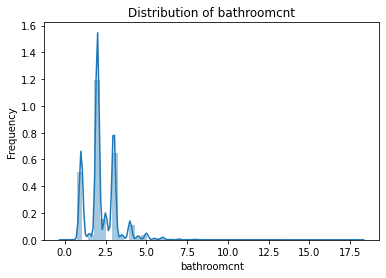

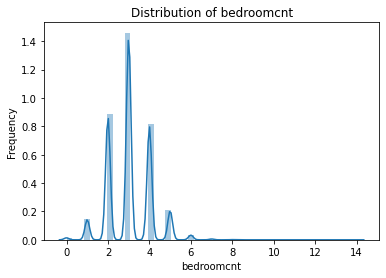

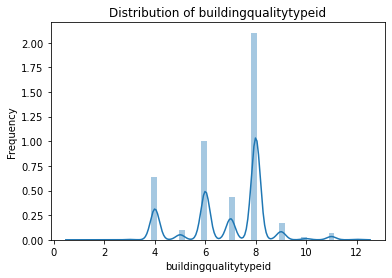

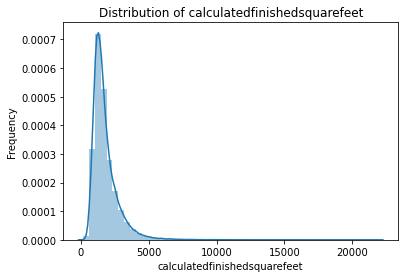

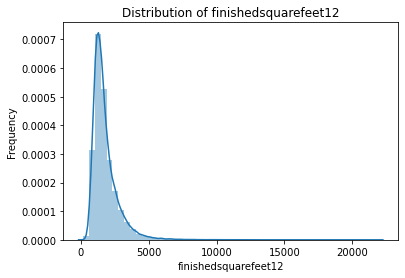

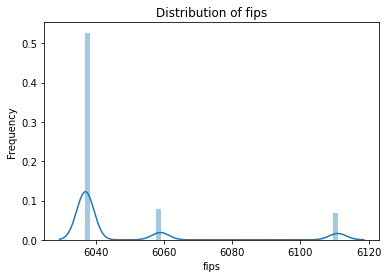

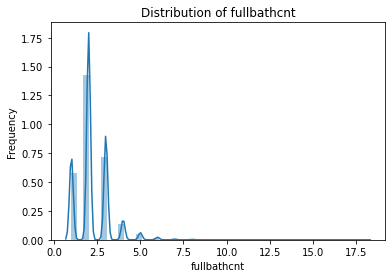

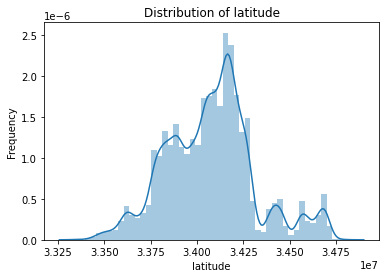

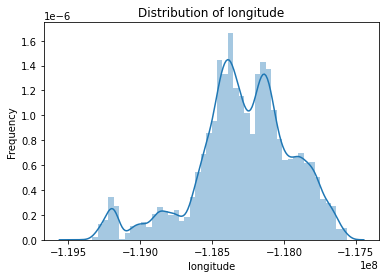

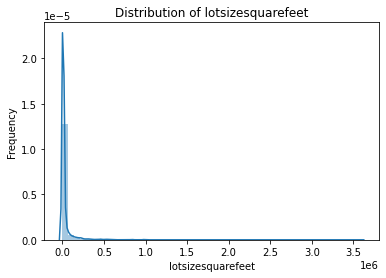

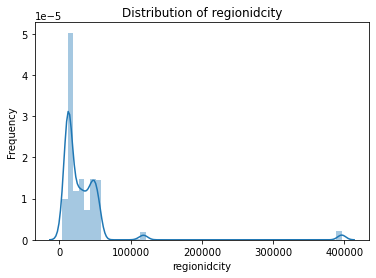

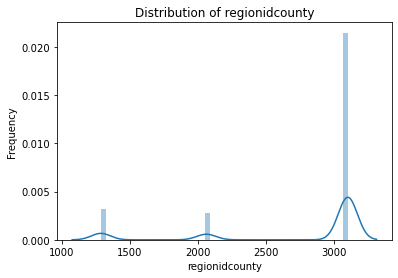

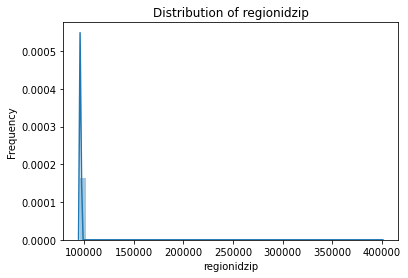

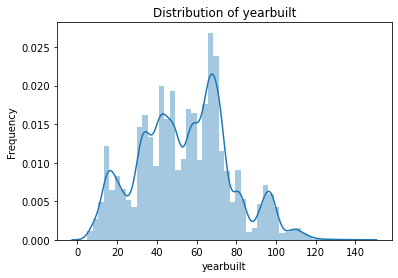

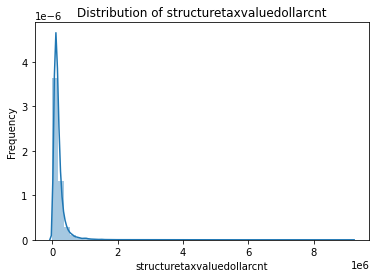

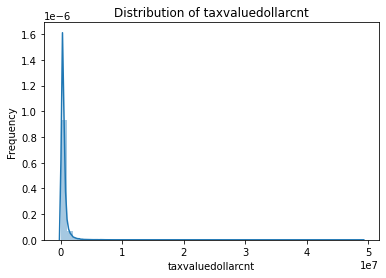

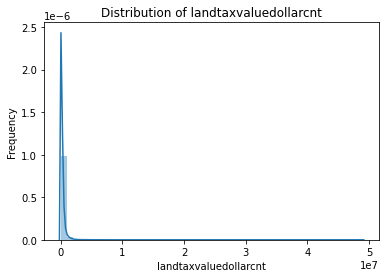

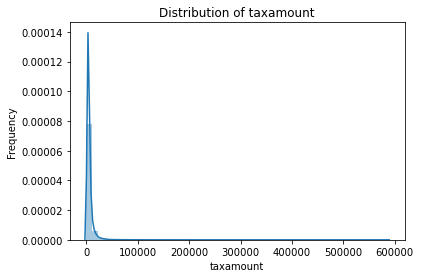

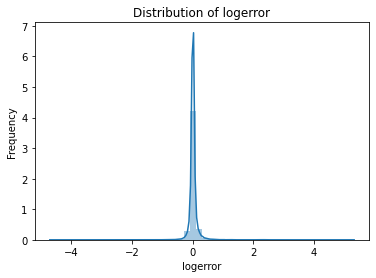

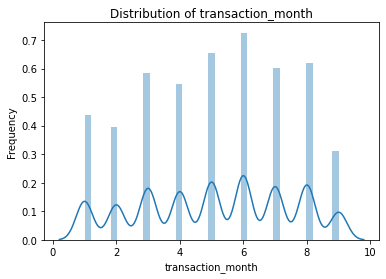

In [20]:
for col in df.columns:
    if df[col].dtype != 'O':
        sns.distplot(df[col])
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.xlabel(col)
        plt.show()

In [21]:
df.drop_duplicates(inplace=True)
# 1 duplicate row

In [76]:
df.heatingorsystemdesc.value_counts()

Central       31486
Floor/Wall    13253
Yes             846
Forced air      776
Solar           101
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [23]:
# Renames columns
df.rename(columns={"bathroomcnt": "bath",
      "bedroomcnt": "bed",
      "buildingqualitytypeid": "quality_id",
      "calculatedfinishedsquarefeet": "sqft",
      "finishedsquarefeet12": "living_sqft", 
      #fips
      "fullbathcnt": "full_bath",
      #latitude
      #longitude
      "lotsizesquarefeet": "lot_sqft",
      "propertycountylandusecode": "landusecode",
      "propertyzoningdesc": "zone"  ,           
      #regionidcity
      #regionidcounty
      #regionidzip
      "yearbuilt": "age",
      "structuretaxvaluedollarcnt": "structure_tax",
      "taxvaluedollarcnt": "taxvalue",
      "landtaxvaluedollarcnt": "landtax",
      #taxamount
      #logerror
      "heatingorsystemdesc": "heating",
      "propertylandusedesc": "landusedesc"
      }, inplace=True)

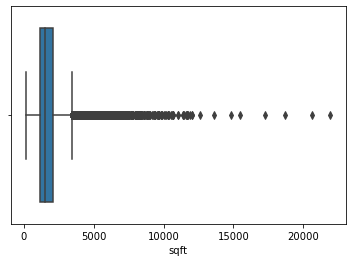

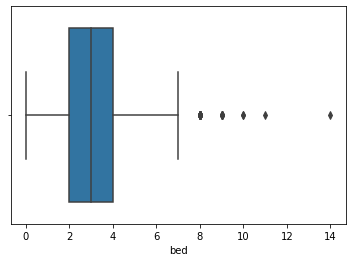

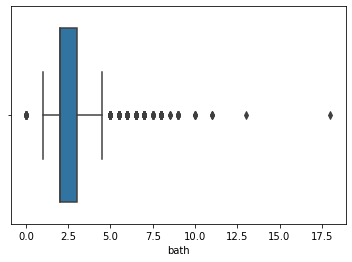

In [24]:
for col in ['sqft', 'bed', 'bath']:
    sns.boxplot(df[col])
    plt.show()

In [25]:
# handle outliers
def remove_outliers(df, cols, k):
    for col in df[cols]:
        q1, q3 = df[col].quantile([0.25, 0.75])
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df
df = remove_outliers(df, ['bed', 'bath', 'sqft'], 1.25)

In [26]:
df

,bath,bed,quality_id,sqft,living_sqft,fips,full_bath,latitude,longitude,lot_sqft,...,regionidzip,age,structure_tax,taxvalue,landtax,taxamount,logerror,heating,landusedesc,transaction_month
1,1.0,2.0,8.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,97099.0,54,88000.0,464000.0,376000.0,5672.48,0.055619,Central,Single Family Residential,1
2,2.0,3.0,8.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,97078.0,59,85289.0,564778.0,479489.0,6488.30,0.005383,Central,Single Family Residential,1
3,3.0,4.0,8.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,96330.0,51,108918.0,145143.0,36225.0,1777.51,-0.103410,Central,Single Family Residential,1
4,3.0,3.0,8.0,1312.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,278581.0,...,96451.0,57,73681.0,119407.0,45726.0,1533.89,0.006940,Central,Condominium,1
5,2.0,3.0,8.0,1492.0,1492.0,6111.0,2.0,34230044.0,-118993991.0,903.0,...,97091.0,39,198640.0,331064.0,132424.0,3508.10,-0.020526,Central,Condominium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72080,2.0,2.0,6.0,1286.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,...,96284.0,81,70917.0,354621.0,283704.0,4478.43,0.020615,Central,Single Family Residential,9
72081,2.0,4.0,8.0,1612.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,...,97116.0,57,50683.0,67205.0,16522.0,1107.48,0.013209,Central,Single Family Residential,9
72082,1.0,3.0,4.0,1032.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,...,96480.0,67,32797.0,49546.0,16749.0,876.43,0.037129,Central,Single Family Residential,9
72083,2.0,3.0,6.0,1762.0,1762.0,6037.0,2.0,33937685.0,-117996709.0,6347.0,...,96171.0,66,140000.0,522000.0,382000.0,6317.15,0.007204,Central,Single Family Residential,9


### Convert Datatypes

In [27]:
df.transaction_month.unique()

array([1, 8, 7, 6, 4, 3, 5, 9, 2])

In [28]:
df.bed = df.bed.astype(int)
df.quality_id = df.quality_id.astype(int)
df.fips = df.fips.astype(int)
df.full_bath = df.full_bath.astype(int)
df.regionidcounty = df.regionidcounty.astype(int)

### Split data


In [29]:
def train_validate_test_split(df):
    train_and_validate, test = train_test_split(df, train_size=0.8, random_state=123)
    train, validate = train_test_split(train_and_validate, train_size=0.75, random_state=123)
    return train, validate, test

In [30]:
train, validate, test = train_validate_test_split(df)
train.shape, validate.shape, test.shape

((31282, 24), (10428, 24), (10428, 24))

In [36]:
df.isnull().sum()

bath                 0
bed                  0
quality_id           0
sqft                 0
living_sqft          0
fips                 0
full_bath            0
latitude             0
longitude            0
lot_sqft             0
landusecode          0
zone                 0
regionidcity         0
regionidcounty       0
regionidzip          0
age                  0
structure_tax        0
taxvalue             0
landtax              0
taxamount            0
logerror             0
heating              0
landusedesc          0
transaction_month    0
dtype: int64

In [43]:
pd.set_option('display.max_columns', None)

In [ ]:
x=[]
for count, value in enumerate(train.heating.unique()):
    x.append((count, value))
x

In [47]:
df.replace({'heating': {'Central': 0,
                        'Floor/Wall': 1,
                        'Forced air': 3,
                        'Yes': 3,
                        'Solar': 3,
                        'None': 3,
                        'Baseboard': 3,
                        'Radiant': 3,
                        'Gravity': 3,
                        'Heat Pump': 3
                       }}, inplace=True)
df

,bath,bed,quality_id,sqft,living_sqft,fips,full_bath,latitude,longitude,lot_sqft,landusecode,zone,regionidcity,regionidcounty,regionidzip,age,structure_tax,taxvalue,landtax,taxamount,logerror,heating,landusedesc,transaction_month
1,1.00000,2,8,1465.00000,1465.00000,6111,1,34449266.00000,-119281531.00000,12647.00000,1110,LAR1,13091.00000,2061,97099.00000,54,88000.00000,464000.00000,376000.00000,5672.48000,0.05562,0,Single Family Residential,1
2,2.00000,3,8,1243.00000,1243.00000,6059,2,33886168.00000,-117823170.00000,8432.00000,122,LAR1,21412.00000,1286,97078.00000,59,85289.00000,564778.00000,479489.00000,6488.30000,0.00538,0,Single Family Residential,1
3,3.00000,4,8,2376.00000,2376.00000,6037,3,34245180.00000,-118240722.00000,13038.00000,0101,LCR110000*,396551.00000,3101,96330.00000,51,108918.00000,145143.00000,36225.00000,1777.51000,-0.10341,0,Single Family Residential,1
4,3.00000,3,8,1312.00000,1312.00000,6037,3,34185120.00000,-118414640.00000,278581.00000,010C,LAR3,12447.00000,3101,96451.00000,57,73681.00000,119407.00000,45726.00000,1533.89000,0.00694,0,Condominium,1
5,2.00000,3,8,1492.00000,1492.00000,6111,2,34230044.00000,-118993991.00000,903.00000,1129,LAR1,51239.00000,2061,97091.00000,39,198640.00000,331064.00000,132424.00000,3508.10000,-0.02053,0,Condominium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72080,2.00000,2,6,1286.00000,1286.00000,6037,2,34245368.00000,-118282383.00000,47405.00000,0100,LARE40,12447.00000,3101,96284.00000,81,70917.00000,354621.00000,283704.00000,4478.43000,0.02062,0,Single Family Residential,9
72081,2.00000,4,8,1612.00000,1612.00000,6111,2,34300140.00000,-118706327.00000,12105.00000,1111,LAR1,27110.00000,2061,97116.00000,57,50683.00000,67205.00000,16522.00000,1107.48000,0.01321,0,Single Family Residential,9
72082,1.00000,3,4,1032.00000,1032.00000,6037,1,34040895.00000,-118038169.00000,5074.00000,0100,SER1*,36502.00000,3101,96480.00000,67,32797.00000,49546.00000,16749.00000,876.43000,0.03713,0,Single Family Residential,9
72083,2.00000,3,6,1762.00000,1762.00000,6037,2,33937685.00000,-117996709.00000,6347.00000,0100,WHR16000*,14634.00000,3101,96171.00000,66,140000.00000,522000.00000,382000.00000,6317.15000,0.00720,0,Single Family Residential,9


In [48]:
df.heating.unique()

array([0, 1, 2, 3, 5, 7, 6, 4, 8, 9])

In [57]:
for count, value in enumerate(df.landusecode.unique()):
    df.replace({'landusecode': {value: count}}, inplace=True)

for count, value in enumerate(df.zone.unique()):
    df.replace({'zone': {value: count}}, inplace=True)

for count, value in enumerate(df.landusedesc.unique()):
    df.replace({'landusedesc': {value: count}}, inplace=True)

In [63]:
df.replace({'zone': {
}})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52138 entries, 1 to 72084
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bath               52138 non-null  float64
 1   bed                52138 non-null  int64  
 2   quality_id         52138 non-null  int64  
 3   sqft               52138 non-null  float64
 4   living_sqft        52138 non-null  float64
 5   fips               52138 non-null  int64  
 6   full_bath          52138 non-null  int64  
 7   latitude           52138 non-null  float64
 8   longitude          52138 non-null  float64
 9   lot_sqft           52138 non-null  float64
 10  landusecode        52138 non-null  int64  
 11  zone               52138 non-null  int64  
 12  regionidcity       52138 non-null  float64
 13  regionidcounty     52138 non-null  int64  
 14  regionidzip        52138 non-null  float64
 15  age                52138 non-null  int64  
 16  structure_tax      521

In [65]:
df.zone

1          0
2          0
3          1
4          2
5          0
        ... 
72080    340
72081      0
72082    339
72083    144
72084    402
Name: zone, Length: 52138, dtype: int64